# Atenuação de Ruído em Imagens Utilizando Stacked Autoencoders

Neste trabalho foram utilizadas as imagens do dateset mnist, extraído através da API (Application programming interface) Keras. As bibliotecas utilizadas foram as seguintes:

## Bibliotecas

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Guillherme\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A Obtenção das imagens que servirão como dados de treino e teste são obtidas da seguinte forma:

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

Cada imagem é representada por uma matriz 28x28 com valores no intervalo [0, 255], como mostra a figura abaixo.

## COLOCAR A IMAGEM DA MATRIZ AQUI SE DER

É necessário normalizar os dados para que eles possam ser trabalhados, nessa normalização os dados de cada entrada de cada matriz irão estar no intervalo [0, 1].

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

As camadas da rede neural pode ser pensada como um array, portanto a matriz que representa a imagem de um número será formatada para um array de tamanho igual a $28*28 = 784$

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

O problema proposto é o de conseguir recuperar uma imagem que contém ruído gaussiano, mas as imagens do dataset não possuem qualquer ruído, sendo assim ele será adicionado manualmente, como mostra o código abaixo:

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Abaixo é mostrado o plot dos vinte imagens divididas em duas linhas. Na primeira tem-se as imagens dos dados de teste originais sem qualquer alteração e na segunda linha os dados com ruído.

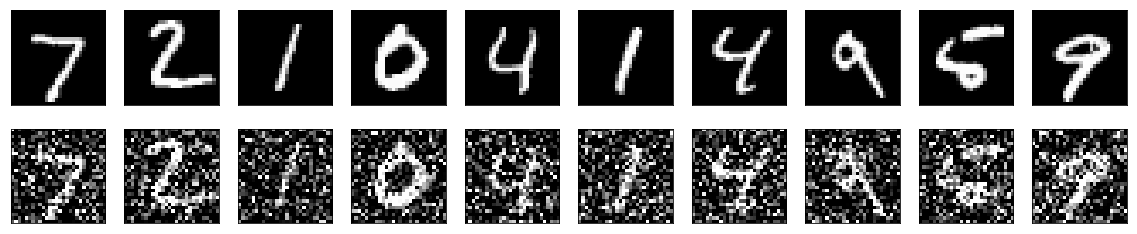

In [7]:
n = 10  # Quantidade de imagens que se deseja mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

A arquitetura da rede é a seguinte: 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784. A implementação em código é mostrada abaixo.

In [8]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

O modelo e o treinamento é feito como mostrado abaixo. O otimizador ajusta a taxa de treinamento. Nessa arquitetura de rede neural, a entrada é a imagem com ruído e a saída é a correspondente sem ruído, dessa forma espera-se que a rede neural aprenda a como remover o ruído da imagem.

In [9]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 23s 386us/step - loss: 0.3222 - val_loss: 0.2634
Epoch 2/100
60000/60000 [==============================] - 18s 304us/step - loss: 0.2598 - val_loss: 0.2578
Epoch 3/100
60000/60000 [==============================] - 17s 283us/step - loss: 0.2542 - val_loss: 0.2494
Epoch 4/100
60000/60000 [==============================] - 17s 286us/step - loss: 0.2468 - val_loss: 0.2465
Epoch 5/100
60000/60000 [==============================] - 17s 283us/step - loss: 0.2413 - val_loss: 0.2356
Epoch 6/100
60000/60000 [==============================] - 17s 283us/step - loss: 0.2306 - val_loss: 0.2227
Epoch 7/100
60000/60000 [==============================] - 18s 306us/step - loss: 0.2187 - val_loss: 0.2125
Epoch 8/100
60000/60000 [==============================] - 18s 300us/step - loss: 0.2105 - val_loss: 0.2077
Epoch 9/100
60000/60000 [==============================] - 19s 321us/step - loss: 0.20

Epoch 76/100
60000/60000 [==============================] - 20s 337us/step - loss: 0.1379 - val_loss: 0.1393
Epoch 77/100
60000/60000 [==============================] - 19s 309us/step - loss: 0.1379 - val_loss: 0.1380
Epoch 78/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.1377 - val_loss: 0.1380
Epoch 79/100
60000/60000 [==============================] - 15s 257us/step - loss: 0.1374 - val_loss: 0.1373
Epoch 80/100
60000/60000 [==============================] - 15s 252us/step - loss: 0.1372 - val_loss: 0.1379
Epoch 81/100
60000/60000 [==============================] - 16s 263us/step - loss: 0.1374 - val_loss: 0.1345
Epoch 82/100
60000/60000 [==============================] - 14s 234us/step - loss: 0.1367 - val_loss: 0.1357
Epoch 83/100
60000/60000 [==============================] - 14s 236us/step - loss: 0.1366 - val_loss: 0.1389
Epoch 84/100
60000/60000 [==============================] - 15s 250us/step - loss: 0.1367 - val_loss: 0.1358
Epoch 85/100
60000/

O trecho de código abaixo mostra como salvar e ler os pesos obtidos após o treinamento.

In [10]:
# SALVAR
W = autoencoder.get_weights()
np.save('SAE_Weight.npy', W)
# LER e configurar os pesos da rede obtidos em um treinamento anterior
#W = np.load('SAE_Weight.npy')
#autoencoder.set_weights(W)

O resultado é obtido após a codificação e decodificação da imagem, esse processo é mostrado abaixo.

In [11]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

encoded_input = Input(shape=(32,))
decoder = Model(encoded_input, autoencoder.layers[-3](encoded_input))
decoded_imgs = decoder.predict(encoded_imgs)

encoded_input = Input(shape=(64,))
decoder = Model(encoded_input, autoencoder.layers[-2](encoded_input))
decoded_imgs = decoder.predict(decoded_imgs)

encoded_input = Input(shape=(128,))
decoder = Model(encoded_input, autoencoder.layers[-1](encoded_input))
decoded_imgs = decoder.predict(decoded_imgs)

A figura abaixo mostra o plot onde na primeira linha tem-se a imagem original, na segunda linha a imagem com ruído e na terceira e última linha a imagem após ser processada pela rede neural.

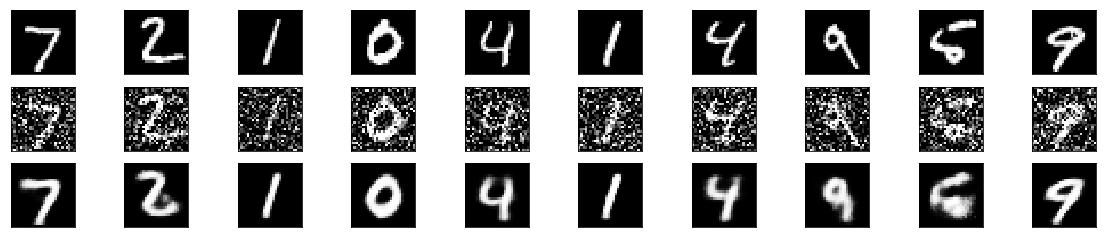

In [12]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noise
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()